# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 0- Importing Libraries and Loading Data

In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa

In [332]:
# modify by placing your own directory where the datasets resides
data_dir = './Datasets/'

# 1- Extraction

Read the csv file and convert it to parquet format (first time only).

In [333]:
# read the csv file and convert it to parquet
# fintech_df_csv = pd.read_csv(data_dir + 'fintech_data_38_52_20136.csv')
# pq.write_table(pa.Table.from_pandas(fintech_df_csv), data_dir + 'fintech_data.parquet')
pd.set_option('display.max_columns', None)

Initialize variables.

In [334]:
fintech_df_uncleaned : pd.DataFrame = None
fintech_df : pd.DataFrame = None

lookup_table : pd.DataFrame = pd.DataFrame(columns=['column', 'original', 'imputed'])


read the parquet file normally and show the first row just to make sure that the data is loaded correctly.

In [335]:
def read_parquet_file(file_path=data_dir + 'fintech_data.parquet') -> pd.DataFrame:
    global fintech_df_uncleaned, data_dir
    fintech_df_uncleaned = pq.read_table(file_path).to_pandas().set_index('Loan Id')
    return fintech_df_uncleaned
read_parquet_file().sample(2)

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
Loan Id,,,,,,,,,,,,,,,,,,,,,,,
20274,YiJLXHgwMVt4PVx4ZTQmXHg3Zlx4YjRceDBmXHg3ZkJNQS...,Anesthesia tech,< 1 year,RENT,22000.0,NaN,Not Verified,283xx,NC,969.0,1937.0,Fully Paid,4000.0,NC,4000.0,36 months,0.2582,23,17 June 2017,False,Individual,other,Other
220100,YidceDkyXHg4Zlx4Y2VceGQ1XHg5OXlceDE5XHhmMD4vT1...,maintenance mechanic,9 years,RENT,73000.0,NaN,Source Verified,604xx,IL,2438.0,51193.0,Fully Paid,24000.0,IL,24000.0,60 months,0.1855,22,15 September 2015,False,Individual,debt_consolidation,Debt consolidation


# 2- EDA

- First, we need to check the columns and their data types *(i.e. some info)*.

In [336]:
fintech_df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, 72174 to 108547
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24648 non-null  object 
 2   Emp Length           25144 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1897 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Status          27030 non-null  object 
 12  Loan Amount          27030 non-null  float64
 13  State                27030 non-null  object 
 14  Funded Amount        27030 non-null  float64
 15  Term                 27030 non-null 

- Second, we may need to check the percentage of missing values in each column.

In [337]:
# form output for each column get missing values count and percentage
def show_missing_values_stats(df: pd.DataFrame, hide_non_missing: bool = False):
    missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values['Percentage'] = missing_values['Missing Values'] / df.shape[0] * 100
    missing_values['Data Type'] = df.dtypes
    missing_values['Unique'] = df.nunique()
    if hide_non_missing:
        missing_values = missing_values[missing_values['Missing Values'] > 0]
    missing_values = missing_values.sort_values(by=['Missing Values', 'Unique'], ascending=False)
    print(missing_values)
show_missing_values_stats(fintech_df_uncleaned)

                     Missing Values  Percentage Data Type  Unique
Annual Inc Joint              25133   92.981872   float64     688
Emp Title                      2382    8.812431    object   13089
Emp Length                     1886    6.977432    object      11
Int Rate                       1265    4.679985   float64     372
Description                     248    0.917499    object     821
Customer Id                       0    0.000000    object   27030
Tot Cur Bal                       0    0.000000   float64   25563
Avg Cur Bal                       0    0.000000   float64   16970
Annual Inc                        0    0.000000   float64    3138
Loan Amount                       0    0.000000   float64    1185
Funded Amount                     0    0.000000   float64    1185
Zip Code                          0    0.000000    object     853
Issue Date                        0    0.000000    object      89
Addr State                        0    0.000000    object      50
State     

In [338]:
fintech_df_uncleaned.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.897000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,25765.000000,27030.000000
mean,7.868950e+04,1.318543e+05,13517.602886,1.431000e+05,15365.320015,15365.320015,0.131064,10.975398
std,5.676035e+04,7.912136e+04,16517.413470,1.595284e+05,9470.959190,9470.959190,0.049329,6.414098
min,5.000000e+02,2.505600e+04,0.000000,0.000000e+00,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,8.500000e+04,3103.250000,2.875325e+04,8000.000000,8000.000000,0.091700,6.000000
50%,6.700000e+04,1.150460e+05,7270.500000,7.938100e+04,13100.000000,13100.000000,0.126100,10.000000
75%,9.500000e+04,1.550000e+05,18688.000000,2.146155e+05,20000.000000,20000.000000,0.160200,15.000000
max,2.548000e+06,1.465000e+06,337533.000000,2.792401e+06,40000.000000,40000.000000,0.309900,35.000000


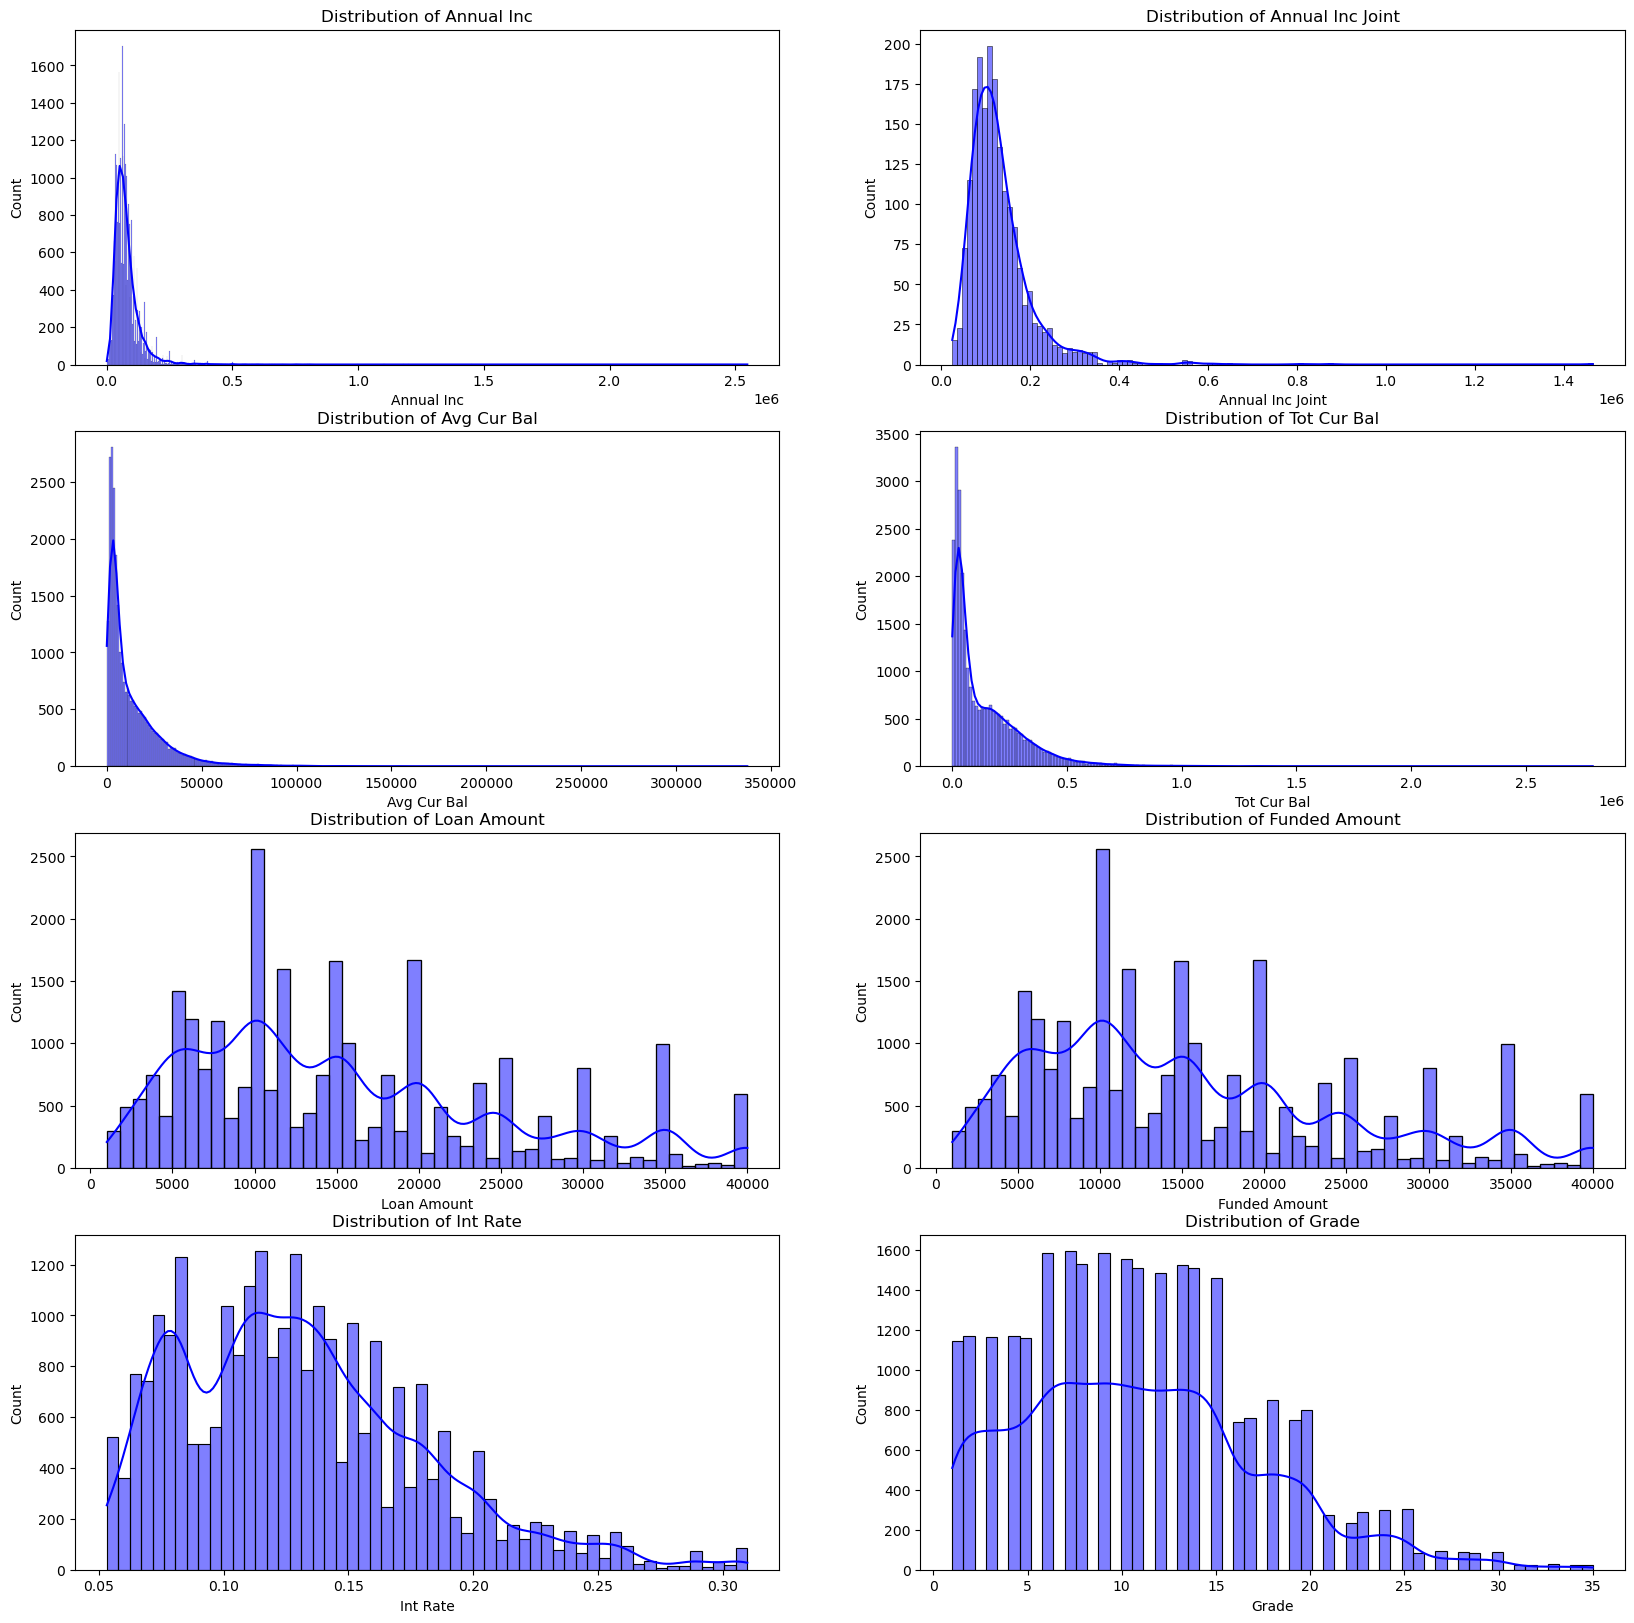

In [339]:
# plot the distribution of all numeric columns in one plot 4x2
def plot_distribution(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))
    for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        sns.histplot(df[col], ax=axes[i // 2, i % 2], kde=True, color='blue')
        axes[i // 2, i % 2].set_title(f'Distribution of {col}')
    plt.show()
plot_distribution(fintech_df_uncleaned)


- From the previous steps graphs, we can see that the values of Annual Income(/Joint) & (Tot/Avg) Cur Bal are hugely skewed to the right. They appear also to have lots of far outliers.

- The following data description and the correlation graphs can be used to understand the data more, and maybe impute the missing values with highly correlated features.

In [340]:
fintech_df_uncleaned.describe(include=['object'])

,Customer Id,Emp Title,Emp Length,Home Ownership,Verification Status,Zip Code,Addr State,Loan Status,State,Term,Issue Date,Type,Purpose,Description
count,27030,24648,25144,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030,26782
unique,27030,13089,11,5,3,853,50,7,50,2,89,5,13,821
top,YidceGI4Llx4YzFceDk5PVx4OWJceGZmXHhmOFx4ZmZceG...,Teacher,10+ years,MORTGAGE,Source Verified,945xx,CA,Current,CA,36 months,16 March 2016,Individual,debt_consolidation,Debt consolidation
freq,1,461,8840,13265,10376,292,3686,17116,3686,19010,653,16953,15290,14373


In [341]:
fintech_df_uncleaned.corr(numeric_only=True)

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Amount,Funded Amount,Int Rate,Grade,Pymnt Plan
Annual Inc,1.000000,0.760300,0.341890,0.471202,0.386269,0.386269,-0.110386,-0.109248,0.000587
Annual Inc Joint,0.760300,1.000000,0.334235,0.454023,0.315899,0.315899,-0.135026,-0.140481,0.016882
Avg Cur Bal,0.341890,0.334235,1.000000,0.828749,0.217191,0.217191,-0.076807,-0.075686,-0.004388
Tot Cur Bal,0.471202,0.454023,0.828749,1.000000,0.303817,0.303817,-0.077054,-0.075027,-0.003588
Loan Amount,0.386269,0.315899,0.217191,0.303817,1.000000,1.000000,0.067050,0.062376,0.011872
Funded Amount,0.386269,0.315899,0.217191,0.303817,1.000000,1.000000,0.067050,0.062376,0.011872
Int Rate,-0.110386,-0.135026,-0.076807,-0.077054,0.067050,0.067050,1.000000,0.924078,0.014171
Grade,-0.109248,-0.140481,-0.075686,-0.075027,0.062376,0.062376,0.924078,1.000000,0.018844
Pymnt Plan,0.000587,0.016882,-0.004388,-0.003588,0.011872,0.011872,0.014171,0.018844,1.000000


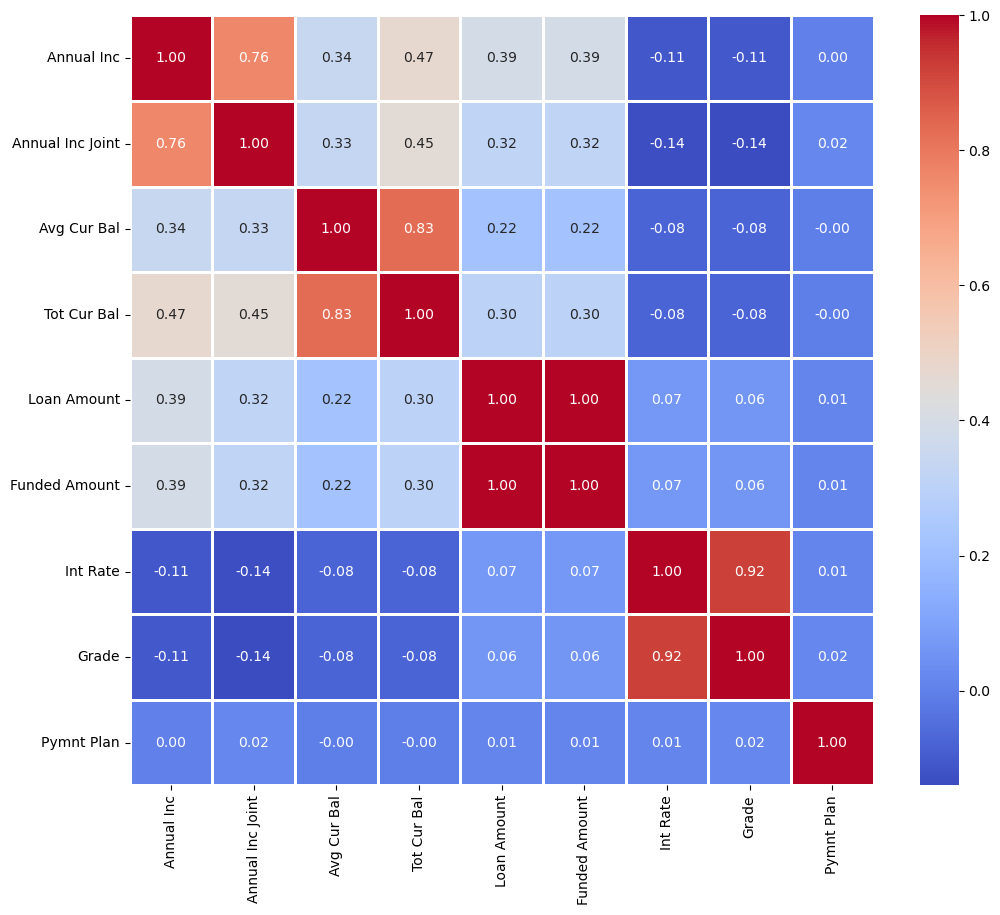

In [342]:
def plot_correlation_heatmap(df: pd.DataFrame):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
    plt.show()
plot_correlation_heatmap(fintech_df_uncleaned)

# 3 - Cleaning Data

## Tidying up column names

In [343]:
# tidy up column names by removing spaces and converting to lower case
fintech_df = fintech_df_uncleaned.copy()
fintech_df.columns = fintech_df_uncleaned.columns.str.replace(' ', '_').str.lower()

In [344]:
fintech_df.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

## Converting data types

### Convert emp_length to integer

In [345]:
fintech_df['emp_length'].value_counts()

emp_length
10+ years    8840
< 1 year     2477
2 years      2367
3 years      2133
1 year       1803
5 years      1698
4 years      1621
6 years      1197
7 years      1041
8 years      1037
9 years       930
Name: count, dtype: int64

- we can choose to change 10+ years to 10 and < 1 year to 0 to make it easier to work with.

### Convert issue_date to datetime

In [346]:
# convert issue_date to datetime
def tidy_issue_date() -> pd.Series:
    return pd.to_datetime(fintech_df['issue_date'])
fintech_df['issue_date'] = tidy_issue_date()

### Convert term to integer (months)

In [347]:
def tidy_term() -> pd.Series:
    return fintech_df['term'].astype(str).str.extract(r'(\d+)').astype(int)
fintech_df['term'] = tidy_term()
print(fintech_df['term'].value_counts())

term
36    19010
60     8020
Name: count, dtype: int64


## Observe inconsistent data

In [348]:
for col in fintech_df_uncleaned.select_dtypes(include=np.object_).columns:
    # print the column name
    print(f'Column: {col}')
    print(fintech_df_uncleaned[col].unique())
    print('\n'+ ("-"*50) +'\n')

Column: Customer Id
['YidceGI4Llx4YzFceDk5PVx4OWJceGZmXHhmOFx4ZmZceGU1VVx4ZmZCXHhlYlx4YjZPXHhjNFx4YjVceDlhXHhhZCVZaVx4Y2RceDFmXHg5Y1x4YjRceDljXHhiMlx4YzNceDdmXHhlMCc='
 'YiIwXHgwZVx4OTlceDBmXHgxNFx4YjZceGE2XHhjZTxceGQxXHhhMFx4ZGRMaUxceDBmJ1xcU1x4MGJceGQ0NFx4OTJceGY4XHhhZG9ceDBmLFx4Y2ZceGE3UVx4YmEi'
 'Yicse3JceGJmXHg4OVx4OGIwXHhkNFx4Y2VceDg2XHhmNFx4MTNceGVhZ1x4ODRceGIyfFx4ZmREXHhkM09jXHgwYlx4YTRceDlkX1x4ZWJceDFiXHhiMFx4ZDlceGIyXHgxMCc='
 ...
 'YidKXHgxZFx4YWJceDhlTFx4ZTRceGIxXHg4NDFceGZiXHgwMFx4ZDRYXHgxMFx4ZGJLRjcsIlx4ZDhGXHhkOVx4ZjgyT35ceDkxXHhlM1x4ZGZceGE1Lyc='
 'YictXHhiNFx4MTEve2NceGY0XHhhNVx4MDZceGRkZlx4MWFceGExXHhhNFxceVx4YzVceDA3UUFFXHg4MVx4ZmRceGI3XHhjYlx4MWFfQkFceGFmXHgxMlx4ZGEn'
 'YidceGFkSFx4ZjBBXHhjMFx4YzVceDkwXHhiY1x4YzhCXHhhZkNceGQ3XHhiYlx4YTU6XHhmY1x4YjVceGIzZiBZXHgxZlx4ZjlceDg1XHgwNFx4YTF5XHg4NlxcXHg5N3Mn']

--------------------------------------------------

Column: Emp Title
['ARX LLC' 'Senior Project Manager' 'Project Manager' ...
 'WORKFORCE DEVELOPMENT SPECIALIST' '

In [349]:
# try to find inconsistencies in the data like case sensitivity
fintech_df_2 = fintech_df_uncleaned.copy()

for col in fintech_df_2.select_dtypes(include=np.object_).columns:
    # Convert the column to uppercase
    fintech_df_2[col + 'upper'] = fintech_df_2[col].str.upper()

    # Group by the uppercase values and filter groups where original values differ
    inconsistencies = fintech_df_2.groupby(col + 'upper').filter(lambda x: len(x[col].unique()) > 1)

    if inconsistencies.shape[0] > 0:
        inc = inconsistencies[col].unique()
        print(f'Column: {col} -> {inc.shape[0]} inconsistencies')
        inc.sort()
        print(inc)

Column: Emp Title -> 2551 inconsistencies
['2nd Mate' '2nd mate' 'ACCOUNT EXECUTIVE' ... 'wellpoint' 'xray tech'
 'yard foreman']
Column: Type -> 2 inconsistencies
['INDIVIDUAL' 'Individual']
Column: Description -> 228 inconsistencies
['BUSINESS' 'Bill Consolidation' 'Bill Pay' 'Bill Payoff'
 'Bill consolidation' 'Bill payoff' 'Bills' 'Business' 'CC Consolidation'
 'CC Debt Consolidation' 'CC Loan' 'CC PAYOFF' 'CC Payoff' 'CC Refinance'
 'CC consolidation' 'CC debt consolidation' 'CONSOLIDATION LOAN'
 'CREDIT CARD CONSOLIDATION' 'CREDIT CARD REFINANCE' 'CREDIT CARDS'
 'CREDITCARDDEBT' 'Car Loan' 'Cc consolidation' 'Cc refinance'
 'Clean Slate' 'Consolidate' 'Consolidate Bills' 'Consolidate bills'
 'Consolidating' 'Consolidation' 'Consolidation ' 'Consolidation Loan'
 'Consolidation loan' 'Credit Card' 'Credit Card Consolidation'
 'Credit Card Consolidation ' 'Credit Card Debt' 'Credit Card Freedom'
 'Credit Card Loan' 'Credit Card Pay Off' 'Credit Card Payoff'
 'Credit Card Refi' 'Cred

check duplicated rows or columns.

In [350]:
print('dup rows number: ',fintech_df_uncleaned[fintech_df_uncleaned.duplicated()].shape[0])
# check if there are duplicate columns
transposed_df = fintech_df_uncleaned.T

dup_cols = transposed_df[transposed_df.duplicated()]
# Get pairs of duplicate columns
duplicate_pairs = []
for dcol in dup_cols.index:
    for col in fintech_df_uncleaned.columns:
        if fintech_df_uncleaned[fintech_df_uncleaned[dcol] == fintech_df_uncleaned[col]].shape[0] == fintech_df_uncleaned.shape[0] and dcol != col:
                duplicate_pairs.append((dcol, col))

print(duplicate_pairs)


dup rows number:  0
[('State', 'Addr State'), ('Funded Amount', 'Loan Amount')]


## Findings and conclusions

emp_title, type and description columns contain data that varies in case only. We can convert them to lowercase.
*(unique values came down from 821 to 686)*

In [351]:
def clean_case_sensitivity(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_cpy = df.copy()
    fintech_df_cpy['emp_title'] = fintech_df['emp_title'].str.lower()
    fintech_df_cpy['type'] = fintech_df_cpy['type'].str.lower()
    fintech_df_cpy['description'] = fintech_df_cpy['description'].str.lower()
    return fintech_df_cpy
fintech_df = clean_case_sensitivity(fintech_df)

We can also see that in `type` there is joint and joint app. We can convert them to joint.

In [352]:
fintech_df['type'].value_counts()

type
individual    25098
joint app      1798
joint            99
direct_pay       35
Name: count, dtype: int64

In [353]:
fintech_df['type'] = fintech_df['type'].replace({'joint app': 'joint'})
fintech_df['type'].value_counts()

type
individual    25098
joint          1897
direct_pay       35
Name: count, dtype: int64

- I also found that there are 2 pairs of columns that are duplicates. But, theoretically, they should differ. So maybe if we get more data, we can have different values in them. So let's keep them for now.

## Observing outliers

In [354]:
outliers_cols = ['avg_cur_bal', 'tot_cur_bal', 'annual_inc', 'annual_inc_joint']# + ['loan_amount', 'int_rate', 'funded_amount', 'grade']

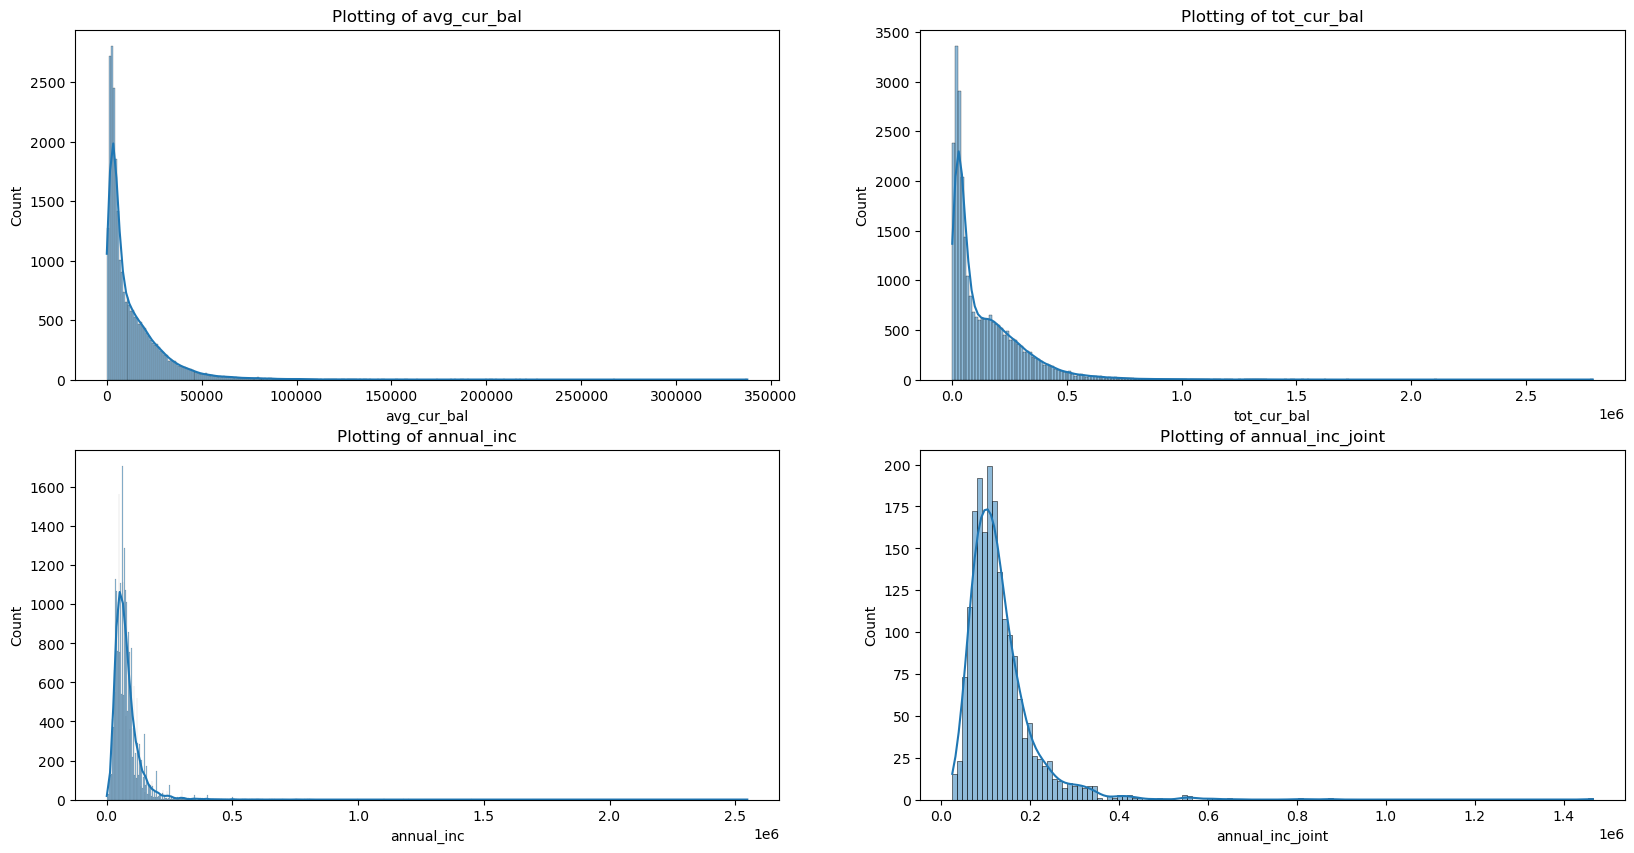

In [355]:
# plot possiblly outliers kde 
def plot_columns(df: pd.DataFrame, cols: list, lim_e6: float = 0.5):
    fig, axes = plt.subplots(int(len(cols)/2 + 0.5), 2, figsize=(20, 10 if len(cols) < 7 else 20))
    for i, col in enumerate(cols):
        sns.histplot(df[col], ax=axes[i // 2, i % 2], kde=True)
        axes[i // 2, i % 2].set_title(f'Plotting of {col}')
        # limit the x-axis to 0.5 * 10^6
        x_max = lim_e6 * 1000000 * (0.25 if col == 'avg_cur_bal' else 1)
        if lim_e6 > 0:
            axes[i // 2, i % 2].set_xlim(0, x_max)
    plt.show()

plot_columns(fintech_df, outliers_cols,0)


### Plotting Z-scores for outliers:
Reason for this:
- *Data is Normally Distributed*: Z-scores are most effective when the data follows a normal distribution or is      approximately symmetric. In this case, the Z-score gives a good measure of how far each point is from the mean.

- *Data is Continuous*: Z-score is suitable when the data is continuous and you want to detect points far from the mean.

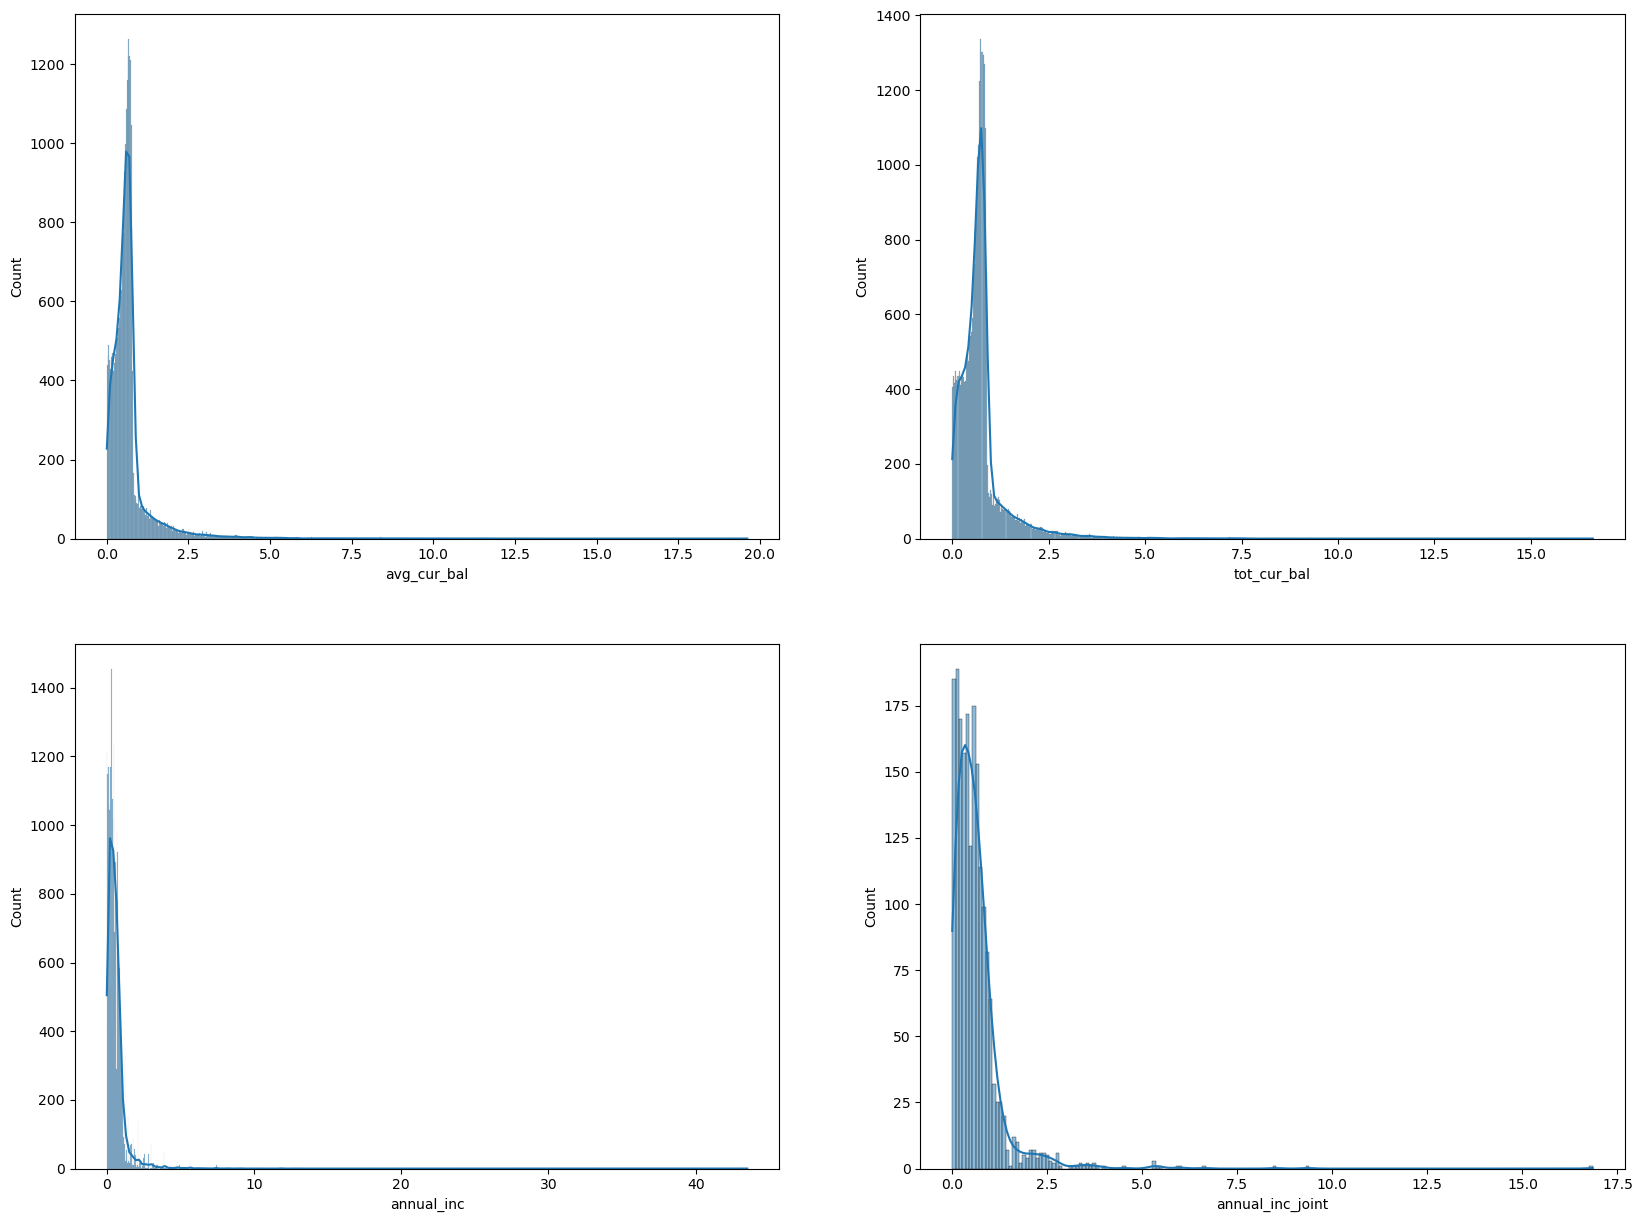

In [356]:
# plot and observe outliers zscore
def plot_columns_zscore(df: pd.DataFrame, cols: list):
    fig, axes = plt.subplots(int(len(cols)/2 +0.5), 2, figsize=(20, 15))
    for i, col in enumerate(cols):
        sns.histplot(np.abs((df[col] - df[col].mean()) / df[col].std()), ax=axes[i // 2, i % 2], kde=True)
    plt.show()

plot_columns_zscore(fintech_df, outliers_cols)

By plotting the Z-scores, we can see that there are many outliers in the data in columns -> `annual_inc`, `annual_inc_joint`, `tot_cur_bal` and `avg_cur_bal` specifically.

## Handling outliers

#### Among the techniques to handle outliers, we can choose to apply **Log Transformation**:

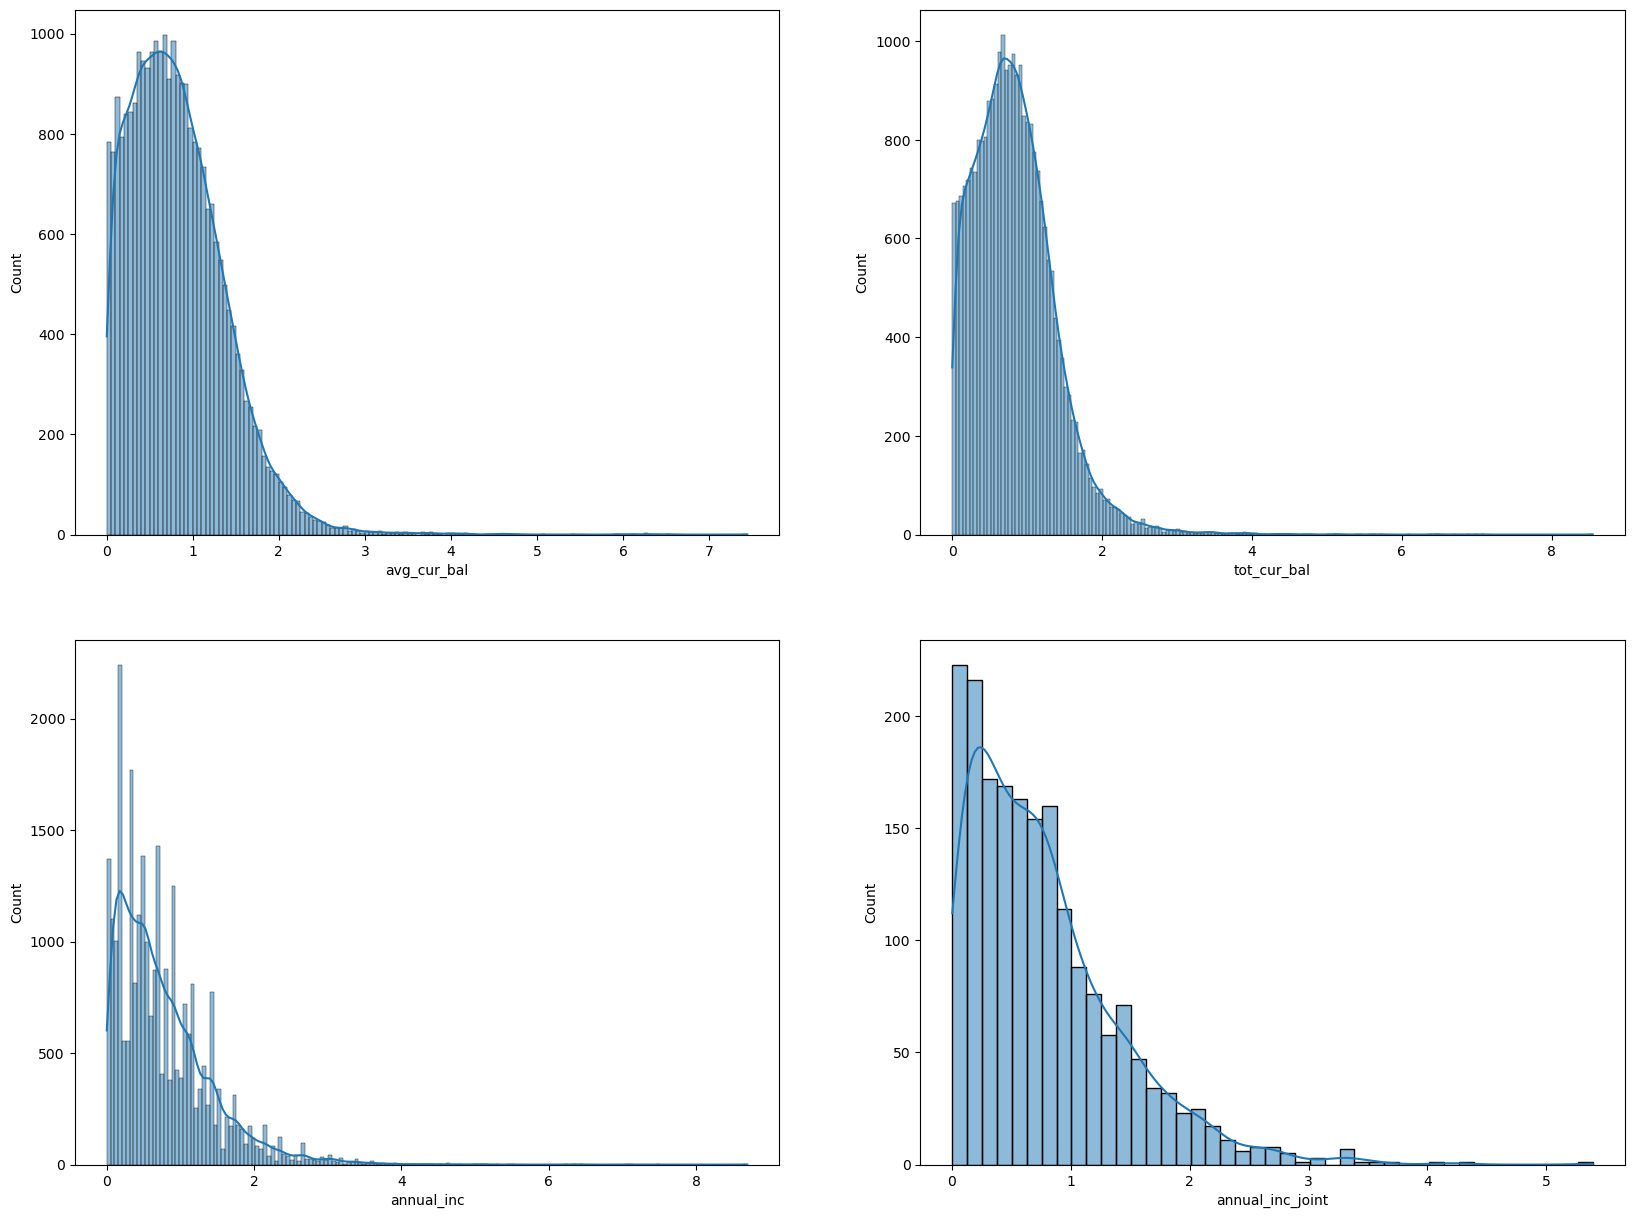

In [357]:
def remove_outliers_log(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    fintech_df_cpy = df.copy()
    for col in cols:
        fintech_df_cpy[col] = np.log1p(fintech_df_cpy[col])
    return fintech_df_cpy

fintech_df_cleaned_log_outliers = remove_outliers_log(fintech_df, outliers_cols)
plot_columns_zscore(fintech_df_cleaned_log_outliers, outliers_cols)

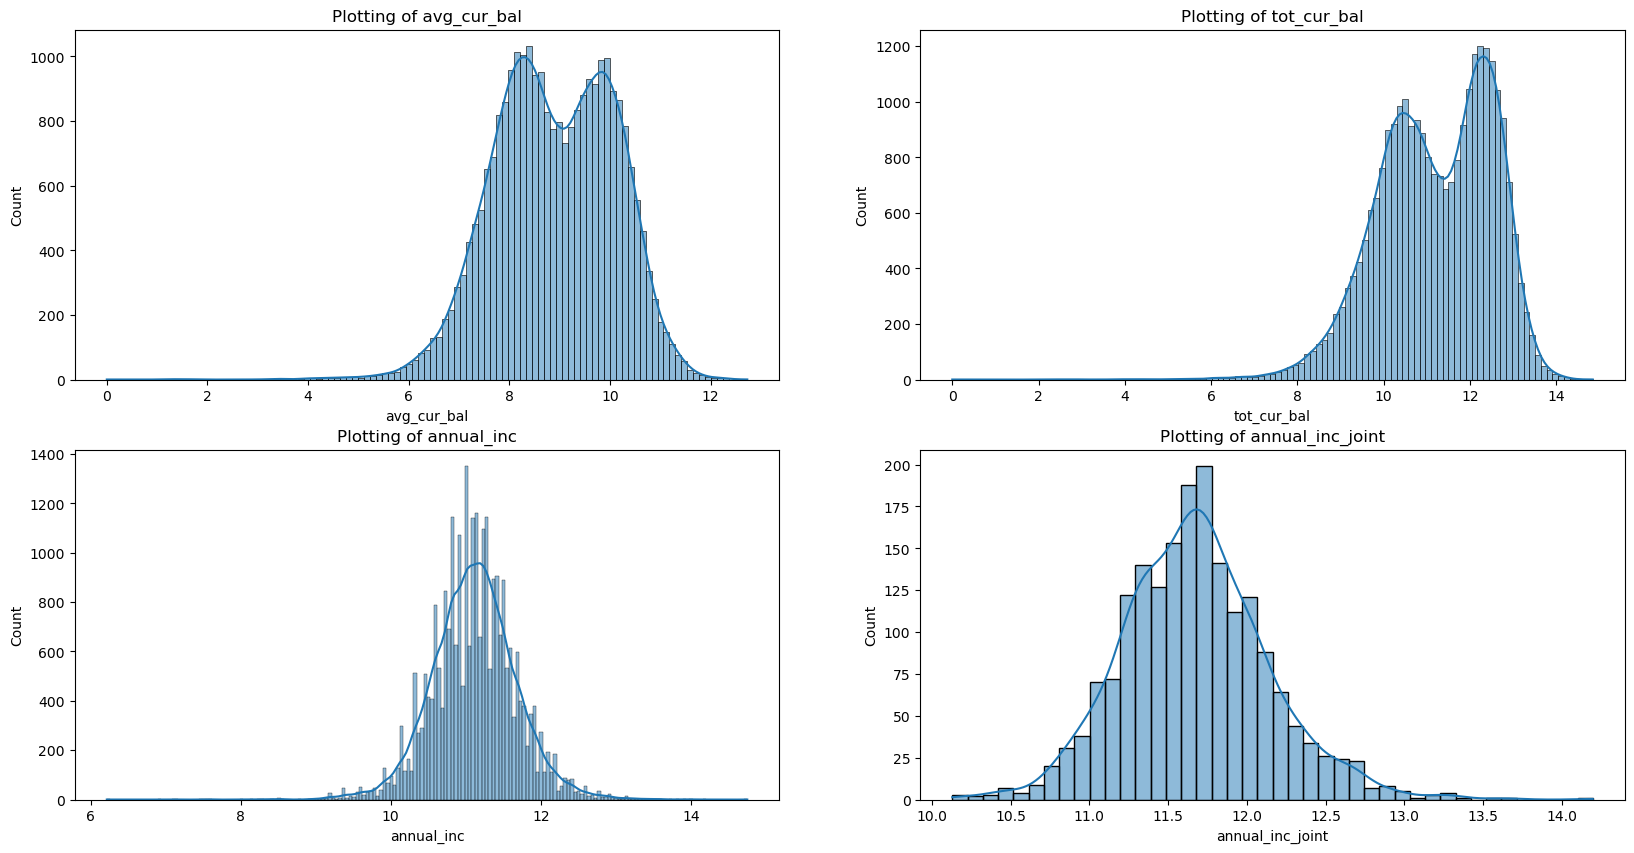

In [358]:
plot_columns(fintech_df_cleaned_log_outliers, outliers_cols, 0)

The above was the Plotting of data after applying log transformation to the columns with outliers. We can see that the data is now more normally distributed, and the outliers are less visible. They also have a good zscores range.

We can now save the columns

In [359]:
for col in outliers_cols:
    fintech_df[col] = fintech_df_cleaned_log_outliers[col]

###### I tried log transformation on int_rate, but it didn't work well. Nearly had no effect on the data. 

## Observing Missing Data

In [360]:
show_missing_values_stats(fintech_df, hide_non_missing=True)

                  Missing Values  Percentage Data Type  Unique
annual_inc_joint           25133   92.981872   float64     688
emp_title                   2382    8.812431    object   11617
emp_length                  1886    6.977432    object      11
int_rate                    1265    4.679985   float64     372
description                  248    0.917499    object     686


#### 1. For `emp_title` (8.81%), we can see that:
- around 21% of the rows that are missing `emp_title` have a value in `emp_length`
- all people that have missing values in `emp_title` have a value in `annual_inc`. As `annual_inc` have no missing values.
- some people have missing values in `emp_title` but have a value in `emp_length`. And some have missing values in `emp_length` but have a value in `emp_title`. Therefore, it can be concluded that this data is maybe missing at random.


In [361]:
fintech_df[fintech_df['emp_title'].isnull() & fintech_df['emp_length'].notnull()].shape[0] / fintech_df[fintech_df['emp_title'].isnull()].shape[0] * 100,                                                                                                                        fintech_df[fintech_df['emp_title'].isnull() & fintech_df['annual_inc'].isnull()].shape[0] / fintech_df[fintech_df['emp_title'].isnull()].shape[0] * 100


(21.116708648194795, 0.0)

#### 2. For `int_rate` (4.68%):
- we cannot say that the missing values mean that the loan has zero interest rate as this is not realistic (at least in the US, where the data is based), so maybe it is missing completely at random.
- we need to impute the missing values.
- we can see from the correlation matrix that `int_rate` is highly correlated with `grade` (92%). So we can use `grade` to impute the missing values.

    

In [362]:
fintech_df[fintech_df['int_rate'].isnull()]['loan_status'].value_counts()
# plot_correlation_heatmap(fintech_df)
fintech_df.corr(numeric_only=True)['int_rate'].sort_values(ascending=False)

int_rate            1.000000
grade               0.924078
term                0.351820
loan_amount         0.067050
funded_amount       0.067050
pymnt_plan          0.014171
tot_cur_bal        -0.053851
avg_cur_bal        -0.058274
annual_inc         -0.123833
annual_inc_joint   -0.131778
Name: int_rate, dtype: float64

#### 3. For `annual_inc_joint` (92.98%):
- we can see that the `annual_inc_joint` is missing for all the rows or loans that are not of type `joint`. 
- we can hence deduce that the missing values are MNAR (missing not at random) as they are related to the type of the loan.
- we can deduce that the it is missing purposely as it is not applicable for non-joint loans.
- since the `annual_inc_joint` is the combined income of the borrower and the co-borrower, we can impute the missing values with the value of `annual_inc` as we can say that the co-borrower has no income.

In [363]:
print('The types of loan (& their counts) that exist are:',fintech_df['type'].value_counts().to_dict(),'\n', ('-'*50))
print('The types of loan that exist which have annual_inc_joint null are:', fintech_df[fintech_df['annual_inc_joint'].isnull()]['type'].value_counts().to_dict(),'\n', ('-'*50))
print('Number of people who have type of loan = "joint" & have annual_inc_joint null =',  fintech_df[ (fintech_df['type'] == 'joint') & fintech_df['annual_inc_joint'].isnull()].shape[0])

The types of loan (& their counts) that exist are: {'individual': 25098, 'joint': 1897, 'direct_pay': 35} 
 --------------------------------------------------
The types of loan that exist which have annual_inc_joint null are: {'individual': 25098, 'direct_pay': 35} 
 --------------------------------------------------
Number of people who have type of loan = "joint" & have annual_inc_joint null = 0


#### 4. For `emp_length` (6.98%):
- we can see that some of the rows that have missing values in `emp_length` have a value in `emp_title`. And some have missing values in `emp_title` but have a value in `emp_length`. Therefore, it can be concluded that this data is maybe missing at random.

In [364]:
print(fintech_df['emp_length'].isnull().sum() , fintech_df['emp_length'].value_counts().to_dict())
print(' The number of people who have emp_length null and emp_title null are:', fintech_df[ (fintech_df['emp_length'].isnull()) & (fintech_df['emp_title'].isnull())].shape[0])
print('VS number of people who have emp_length null and emp_title not null are:', fintech_df[ (fintech_df['emp_length'].isnull()) & (fintech_df['emp_title'].notnull())].shape[0])



1886 {'10+ years': 8840, '< 1 year': 2477, '2 years': 2367, '3 years': 2133, '1 year': 1803, '5 years': 1698, '4 years': 1621, '6 years': 1197, '7 years': 1041, '8 years': 1037, '9 years': 930}
 The number of people who have emp_length null and emp_title null are: 1879
VS number of people who have emp_length null and emp_title not null are: 7


#### 5. There is a value '**ANY**' in `home_ownership` that is not clear. It's a small percentage of the data.

In [365]:
fintech_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    13265
RENT        10584
OWN          3140
ANY            40
OTHER           1
Name: count, dtype: int64

## Handling Missing data

#### 1. For `emp_title`:
- After observing the data, trying multi-variate imputation, and checking multiple variables' combinations (with preserving logical relationships of course), I found that the best way to impute the missing values is to use the `grade` and `home_ownership` columns:
    - The `home_ownership` column can help us group, because sometimes ownerships, salaries, and job titles are related.
    - The `grade` column can help us group, because sometimes the grade of the loan can be related to the job title, it could refer to the history of the borrower, or it could refer to the salary and the borrower's ability to pay.
- The two columns chosen in grouping gave us the best results in imputing the missing values distribution-wise, rather than just increasing already high-dense values.

In [366]:
# # Calculate the mode for each group
# group_means = fintech_df.groupby('annual_inc')['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
# group_means = fintech_df.groupby(['grade', 'annual_inc'])['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
def fill_na_emp_title(df : pd.DataFrame, grouping_rows: list = ['grade', 'home_ownership']) -> pd.DataFrame:
    mode = df['emp_title'].mode().iloc[0]
    group_means = df.groupby(grouping_rows)['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else mode)
    def filling_lambda_emp_title(row, group_means, grouping_rows):
        if pd.isna(row['emp_title']):
            key = tuple(row[grp] for grp in grouping_rows)
            if key in group_means:
                return group_means[key]
        return row['emp_title']

    # Apply the function
    df_cpy = df.copy()
    df_cpy['emp_title'] = df.apply(lambda row: filling_lambda_emp_title(row, group_means, grouping_rows), axis=1)

    # We will not update the lookup table with emp_title for now
    # # Update the lookup table
    # global lookup_table
    # missing_values = df['emp_title'].isnull()
    # new_lookup_entries = pd.DataFrame({
    #     'column': ['emp_title'] * missing_values.sum(),
    #     'original': df.loc[missing_values, 'emp_title'],
    #     'imputed': df_cpy.loc[missing_values, 'emp_title']
    # }).drop_duplicates(subset=['column', 'original', 'imputed'])
    
    # lookup_table = pd.concat([lookup_table, new_lookup_entries], ignore_index=True)
    
    return df_cpy

fintech_df = fill_na_emp_title(fintech_df)
fintech_df['emp_title'].isnull().sum()


0

#### 2. For `int_rate` we will use the `grade` column to impute the missing values. And we will check which of the median or mean is better to use. (reasoning above)

In [367]:
def int_rate_fillna(df: pd.DataFrame, meanormedian ='mean') -> pd.DataFrame:
    fintech_df_int_rate = df.copy()

    fintech_df_int_rate['int_rate'] = fintech_df_int_rate.groupby('grade')['int_rate'].transform(lambda x: x.fillna(x.median() if meanormedian == 'median' else x.mean()))

    # # Update the lookup table
    # global lookup_table
    # missing_values = df['int_rate'].isnull()
    # new_lookup_entries = pd.DataFrame({
    #     'column': ['int_rate'] * missing_values.sum(),
    #     'original': df.loc[missing_values, 'int_rate'],
    #     'imputed': fintech_df_int_rate.loc[missing_values, 'int_rate']
    # }).drop_duplicates(subset=['column', 'original', 'imputed'])

    # lookup_table = pd.concat([lookup_table, new_lookup_entries], ignore_index=True)
    return fintech_df_int_rate


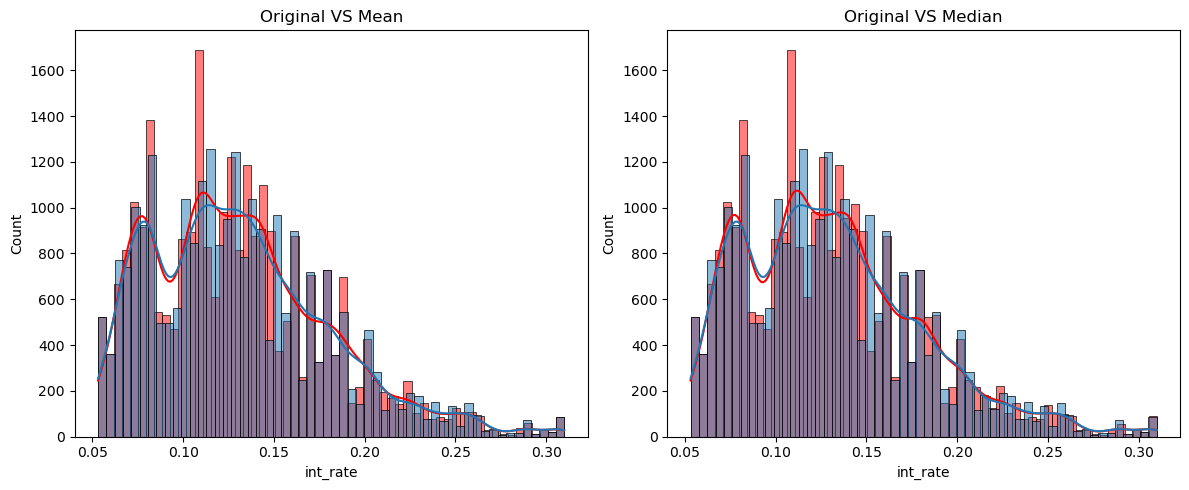

In [368]:
fintech_df_int_rate_mean = int_rate_fillna(fintech_df, 'mean')
fintech_df_int_rate_median = int_rate_fillna(fintech_df, 'median')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(fintech_df_int_rate_mean['int_rate'], ax=axes[0], kde=True, color='red')
sns.histplot(fintech_df['int_rate'], ax=axes[0], kde=True)
axes[0].set_title('Original VS Mean')

sns.histplot(fintech_df_int_rate_median['int_rate'], ax=axes[1], kde=True, color='red')
sns.histplot(fintech_df['int_rate'], ax=axes[1], kde=True)
axes[1].set_title('Original VS Median')

plt.tight_layout()
plt.show()


There may not be a noticiable difference between the two methods. So we can use the mean.

In [369]:
fintech_df['int_rate'] = int_rate_fillna(fintech_df)['int_rate']

lookup_table[lookup_table['column'] == 'int_rate']

,column,original,imputed


#### 3. since the `annual_inc_joint` is the combined income of the borrower and the co-borrower, we can impute the missing values with the value of `annual_inc` as we can say that the co-borrower has no income.

In [370]:
def annual_inc_joint_fillna(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_annual_inc_joint = df.copy()

    fintech_df_annual_inc_joint['annual_inc_joint'] = fintech_df_annual_inc_joint['annual_inc_joint'].fillna(fintech_df_annual_inc_joint['annual_inc'])

    # Update the lookup table
    # global lookup_table
    # missing_values = df['annual_inc_joint'].isnull()
    # new_lookup_entries = pd.DataFrame({
    #     'column': ['annual_inc_joint'] * missing_values.sum(),
    #     'original': df.loc[missing_values, 'annual_inc_joint'],
    #     'imputed': fintech_df_annual_inc_joint.loc[missing_values, 'annual_inc_joint']
    # }).drop_duplicates(subset=['column', 'original', 'imputed'])

    # lookup_table = pd.concat([lookup_table, new_lookup_entries], ignore_index=True)
    
    return fintech_df_annual_inc_joint

In [371]:
fintech_df['annual_inc_joint'] = annual_inc_joint_fillna(fintech_df)['annual_inc_joint']
lookup_table[lookup_table['column'] == 'annual_inc_joint']

,column,original,imputed


#### 4. For `emp_length`:
- We can try to impute the missing values using the `emp_title` & `annual_inc` columns. As the job title and the salary can be related to the employment length and closely related to each other.
- We can also convert the `emp_length` to integer value to make it easier to work with.
- We can hence convert 10+ years to 10 and < 1 year to 0.

In [372]:

def emp_length_fillna(df: pd.DataFrame):
    fintech_df_emp_length = df.copy()
    mode = fintech_df_emp_length['emp_length'].mode()[0]
    fintech_df_emp_length['emp_length'] = fintech_df_emp_length.groupby(['emp_title', 'annual_inc'])['emp_length'].transform(lambda x: x.fillna(x.mode()[0] if x.mode().shape[0] > 0 else mode))
    # change the type to integer
    # but first we need to convert '< 1 year' to 0 and '10+ years' to 11
    fintech_df_emp_length['emp_length'] = fintech_df_emp_length['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})
    fintech_df_emp_length['emp_length'] = fintech_df_emp_length['emp_length'].str.extract(r'(\d+)').astype(int)

    # Update the lookup table
    global lookup_table
    # Identify transformed values
    transformed_values = df['emp_length'].isin(['< 1 year', '10+ years'])

    # Create new lookup entries DataFrame
    new_lookup_entries = pd.DataFrame({
        'column': ['emp_length'] * transformed_values.sum(),
        'original': df.loc[transformed_values, 'emp_length'],
        'imputed': fintech_df_emp_length.loc[transformed_values, 'emp_length']
    }).drop_duplicates(subset=['column', 'original', 'imputed'])

    lookup_table = pd.concat([lookup_table, new_lookup_entries], ignore_index=True)
    
    
    return fintech_df_emp_length

In [373]:

fintech_df_emplength = emp_length_fillna(fintech_df)
print(fintech_df['emp_length'].value_counts(),fintech_df_emplength['emp_length'].value_counts())
# fintech_df_emplength.corr(numeric_only=True)['emp_length'].sort_values(ascending=False) * 100
# print(test[test['emp_length'].isnull()].shape[0])
# print(test[test['emp_length'] == 'Unknown'])
# print(test[ test['emp_title'].str.contains('basketball')]['emp_title'].value_counts())
# test[test['emp_title'].str.startswith('basketball')]
print(lookup_table[lookup_table['column'] == 'emp_length'])

emp_length
10+ years    8840
< 1 year     2477
2 years      2367
3 years      2133
1 year       1803
5 years      1698
4 years      1621
6 years      1197
7 years      1041
8 years      1037
9 years       930
Name: count, dtype: int64 emp_length
10    10325
0      2629
2      2403
3      2200
1      1841
5      1730
4      1666
6      1210
8      1048
7      1042
9       936
Name: count, dtype: int64
       column   original imputed
0  emp_length   < 1 year       0
1  emp_length  10+ years      10


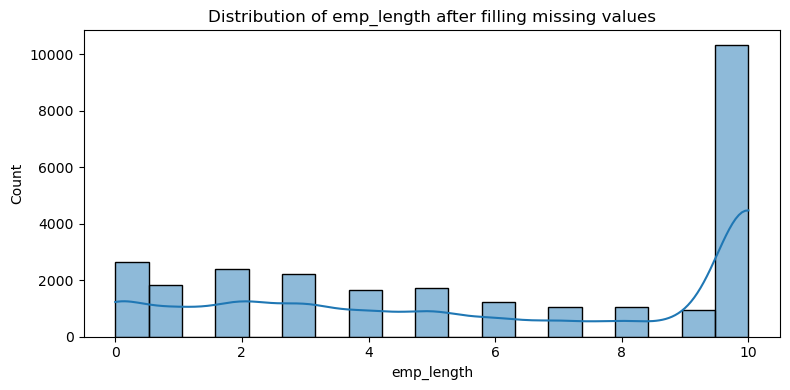

In [374]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(fintech_df_emplength['emp_length'], kde=True)
axes.set_title(f'Distribution of emp_length after filling missing values')

plt.tight_layout()
plt.show()

In [375]:
fintech_df = fintech_df_emplength

That's the best I could do for the data of this column.

#### 5. For `home_ownership`:
- We can see that there is a value '**ANY**' that is not clear. It's a small percentage of the data. 
<!-- - We can group it by 'annual_inc' and get mode because sometimes ownerships and salaries are related. Also, it wouldn't make a huge difference. -->
- We can make it 'OTHER' to unify the data. It wouldn't make a huge difference.


In [376]:
def home_ownership_fillna(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_home_ownership = df.copy()
    fintech_df_home_ownership['home_ownership'] = fintech_df_home_ownership['home_ownership'].str.upper()
    # mode = fintech_df_home_ownership['home_ownership'].mode()[0]
    # fintech_df_home_ownership['home_ownership'] = fintech_df_home_ownership.groupby('annual_inc')['home_ownership'].transform(lambda x: x.replace('ANY', x.mode()[0] if x.mode().shape[0] > 0 and x.mode()[0] != 'ANY' else mode))
    # # Update the lookup table
    # global lookup_table
    # missing_values = df['home_ownership'].isnull()
    # transformed_values = df['home_ownership'] == 'ANY'
    # new_lookup_entries = pd.DataFrame({
    #     'column': ['home_ownership'] * (missing_values.sum() + transformed_values.sum()),
    #     'original': pd.concat([df.loc[missing_values, 'home_ownership'], df.loc[transformed_values, 'home_ownership']]),
    #     'imputed': pd.concat([fintech_df_home_ownership.loc[missing_values, 'home_ownership'], fintech_df_home_ownership.loc[transformed_values, 'home_ownership']])
    # }).drop_duplicates(subset=['column', 'original', 'imputed'])
    # lookup_table = pd.concat([lookup_table, new_lookup_entries], ignore_index=True)
    fintech_df_home_ownership['home_ownership'] = fintech_df_home_ownership['home_ownership'].replace('ANY', 'OTHER')

    global lookup_table
    # add (ANY, OTHER) to lookup table
    new_lookup_entry = pd.DataFrame({
        'column': ['home_ownership'],
        'original': ['ANY'],
        'imputed': ['OTHER']
    })
    lookup_table = pd.concat([lookup_table, new_lookup_entry], ignore_index=True)
    
    return fintech_df_home_ownership
    
fintech_df = home_ownership_fillna(fintech_df)
fintech_df['home_ownership'].value_counts(), lookup_table[lookup_table['column'] == 'home_ownership']

(home_ownership
 MORTGAGE    13265
 RENT        10584
 OWN          3140
 OTHER          41
 Name: count, dtype: int64,
            column original imputed
 2  home_ownership      ANY   OTHER)

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

#### 1. Adding a column for `month_number` : int,  from the `issue_date` column.
#### 2. Adding a column for `salary_can_cover` : bool,  if the `annual_inc` is greater than the `loan_amount`.
#### 3. Adding a column for `letter_grade` : str : categorical {A, B, C, D, E, F, G},  from the `grade` column.
#### 4. Adding a column for `installment_per_month` : float, where monthly installment M =>
$$M = P \times \frac{r \times (1 + r)^n}{(1 + r)^n - 1}$$
where:
 - M is the monthly installment
 - P is the loan principle/amount
 - r is the monthly interest rate , r = int rate/12
 - n is the number of payments/months



##### ***Note: The `annual_inc` column has been log transformed, so we need to revert it back to its original form before calculating the `salary_can_cover` column.***

In [377]:
def add_new_features(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_new = df.copy()
    # inverse log1 transformation the annual_inc
    annual_inc = np.expm1(fintech_df_new['annual_inc'])
    fintech_df_new['month_number'] = fintech_df['issue_date'].dt.month.astype(int)
    fintech_df_new['salary_can_cover'] = annual_inc >= fintech_df['loan_amount']
    def grade_to_letter(grade : int) -> str:
        return 'A' if grade <= 5 else 'B' if grade <= 10 else 'C' if grade <= 15 else 'D' if grade <= 20 else 'E' if grade <= 25 else 'F' if grade <= 30 else 'G'
    fintech_df_new['letter_grade'] = fintech_df['grade'].apply(grade_to_letter)
    fintech_df_new['installment_per_month'] = fintech_df['loan_amount'] * (fintech_df['int_rate'] / 12) *\
                ((1 + (fintech_df['int_rate'] / 12)) ** fintech_df['term'])\
                / (((1 + (fintech_df['int_rate'] / 12)) ** fintech_df['term']) - 1)
    
    # Update the lookup table with the grade to letter mapping
    global lookup_table
    new_rows = pd.DataFrame([{'column': 'grade', 'original': i, 'imputed': grade_to_letter(i)} for i in range(1, 36)])
    lookup_table = pd.concat([lookup_table, new_rows], ignore_index=True)
    
    return fintech_df_new

fintech_df = add_new_features(fintech_df)
print(lookup_table[lookup_table['column'] == 'grade'])
fintech_df.sample(3)

   column original imputed
3   grade        1       A
4   grade        2       A
5   grade        3       A
6   grade        4       A
7   grade        5       A
8   grade        6       B
9   grade        7       B
10  grade        8       B
11  grade        9       B
12  grade       10       B
13  grade       11       C
14  grade       12       C
15  grade       13       C
16  grade       14       C
17  grade       15       C
18  grade       16       D
19  grade       17       D
20  grade       18       D
21  grade       19       D
22  grade       20       D
23  grade       21       E
24  grade       22       E
25  grade       23       E
26  grade       24       E
27  grade       25       E
28  grade       26       F
29  grade       27       F
30  grade       28       F
31  grade       29       F
32  grade       30       F
33  grade       31       G
34  grade       32       G
35  grade       33       G
36  grade       34       G
37  grade       35       G


,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,month_number,salary_can_cover,letter_grade,installment_per_month
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
184707,YidceGIzXHhjYVx4ZTZQa1x4OTJceGY0XHg4ZFFceGE4Jl...,cnc operator,10,RENT,11.608245,11.608245,Verified,064xx,CT,8.807771,11.004913,Current,19200.0,CT,19200.0,36,0.0789,2,2016-03-16,False,individual,credit_card,credit card refinancing,3,True,A,600.684386
114509,YidceDAySXElXHhjOFx4ZTFceDgwXHhjYW1ceGQ3XHhkMV...,financial analyst,1,RENT,11.156265,11.156265,Source Verified,194xx,PA,7.968320,10.165198,Fully Paid,11700.0,PA,11700.0,60,0.1655,20,2015-04-15,False,individual,credit_card,credit card refinancing,4,True,D,287.951685
242888,YidceDhiXHRceDlmXHhlOCJceGY2RipceGFmXHg4ZFx4Zm...,driver,4,OWN,11.767575,11.767575,Verified,291xx,SC,8.520388,10.822734,Current,30000.0,SC,30000.0,36,0.1799,19,2017-04-17,False,individual,major_purchase,major purchase,4,True,D,1084.421377


## 4.2 - Encoding

#### Checking what columns need to be encoded.

In [378]:
print(list(filter(lambda c : fintech_df[c].value_counts().shape[0] < fintech_df.shape[0],fintech_df.select_dtypes(include=np.object_).columns)), '\n', ('-'*50))
encoding_candidate_columns = ['home_ownership', 'verification_status', 'purpose', 'type', 'loan_status', 'addr_state', 'state', 'letter_grade']
for col in encoding_candidate_columns:
    print(f'Column: {col}')
    print(fintech_df[col].unique())
    print(("-"*50))

['emp_title', 'home_ownership', 'verification_status', 'zip_code', 'addr_state', 'loan_status', 'state', 'type', 'purpose', 'description', 'letter_grade'] 
 --------------------------------------------------
Column: home_ownership
['MORTGAGE' 'RENT' 'OTHER' 'OWN']
--------------------------------------------------
Column: verification_status
['Verified' 'Source Verified' 'Not Verified']
--------------------------------------------------
Column: purpose
['debt_consolidation' 'credit_card' 'other' 'home_improvement' 'car'
 'house' 'medical' 'vacation' 'small_business' 'major_purchase' 'moving'
 'renewable_energy' 'wedding']
--------------------------------------------------
Column: type
['individual' 'joint' 'direct_pay']
--------------------------------------------------
Column: loan_status
['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']
--------------------------------------------------
Column: addr_state
['TN' 'IL' 'GA' 'VA'

#### Encoding Process:
1. Encoding the `state` & `addr_state` columns using label encoding. why? because they are categorical columns with a lot of unique values. It may add much overhead to the model if we use one-hot encoding.
2. Encoding the `*[home_ownership, verification_status, type, loan_status, purpose]*` columns using one-hot encoding. why? because they are categorical columns with few unique values, and they are not ordinal.
3. Encoding the `letter_grade` column using label encoding. why? because it is an ordinal column.

In [379]:
# lookup_table = pd.DataFrame(columns=['column', 'original', 'imputed'])

def encode_categorical(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_encoded = df.copy()
    label_encoding_columns = list(filter(lambda c : 'state' in c or c == 'letter_grade', encoding_candidate_columns))
    one_hot_encoding_columns = list(filter(lambda c : c not in label_encoding_columns, encoding_candidate_columns))
    for col in label_encoding_columns:
        fintech_df_encoded[col] = fintech_df_encoded[col].astype('category')
        fintech_df_encoded[col+'_encoded'] = fintech_df_encoded[col].cat.codes
    fintech_df_encoded = pd.get_dummies(fintech_df_encoded, columns=one_hot_encoding_columns, prefix=one_hot_encoding_columns, drop_first=True)
    fintech_df_encoded.columns = fintech_df_encoded.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

    # store the encoding in the lookup table (column, original, imputed)
    for col in label_encoding_columns:
        for unique_val in fintech_df_encoded[col].unique():
            new_row = {
                'column': col,
                'original': unique_val,
                'imputed': fintech_df_encoded[fintech_df_encoded[col] == unique_val][col + '_encoded'].iloc[0]
            }
            if new_row not in lookup_table.to_dict(orient='records'):
                lookup_table.loc[len(lookup_table)] = new_row
        
    return fintech_df_encoded

fintech_df_encoded = encode_categorical(fintech_df)
print(lookup_table.sample(3))
fintech_df_encoded.sample(3)

         column original imputed
61   addr_state       WY      49
102       state       KY      16
26        grade       24       E


,customer_id,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,description,month_number,salary_can_cover,letter_grade,installment_per_month,addr_state_encoded,state_encoded,letter_grade_encoded,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_source_verified,verification_status_verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,type_individual,type_joint,loan_status_current,loan_status_default,loan_status_fully_paid,loan_status_in_grace_period,loan_status_late_(16_30_days),loan_status_late_(31_120_days)
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183291,YidceGQyJE1ceGMyI3oqXHhmY1x4OTFceDhhcVx4MDVceG...,teacher,0,11.082158,12.594734,750xx,TX,10.539112,12.618530,18925.0,TX,18925.0,60,0.072731,1,2019-11-19,False,debt consolidation,11,True,A,377.181114,42,42,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
215427,YidceGE0XHhiY1x4ZGJceGQ2XHhhYVx4YzAgXHhlYklceD...,flex administrator,4,10.915107,11.608245,550xx,MN,10.271078,12.062808,24000.0,MN,24000.0,36,0.079700,2,2018-02-18,False,debt consolidation,2,True,A,751.740665,22,22,0,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
53223,YiJceDFhTFx4ODVceDEyXHgxN1x4OWRceGRjfEFSXHhmOH...,fraud manager,8,10.839601,10.839601,454xx,OH,7.983440,10.180513,7000.0,OH,7000.0,36,0.097600,10,2015-12-15,False,credit card refinancing,12,True,B,225.082382,34,34,1,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [380]:
# save encoded
fintech_df = fintech_df_encoded

## 4.22 - Findings and conlcusions

## 4.3 - Normalization 

In [381]:
for col in fintech_df.select_dtypes(include=np.number).columns:
    print(col, ":   min=" , fintech_df[col].min(), " max=", fintech_df[col].max())

emp_length :   min= 0  max= 10
annual_inc :   min= 6.2166061010848646  max= 14.750819688138792
annual_inc_joint :   min= 8.517393171418904  max= 14.750819688138792
avg_cur_bal :   min= 0.0  max= 12.729421524961454
tot_cur_bal :   min= 0.0  max= 14.842412715307894
loan_amount :   min= 1000.0  max= 40000.0
funded_amount :   min= 1000.0  max= 40000.0
term :   min= 36  max= 60
int_rate :   min= 0.0531  max= 0.3099
grade :   min= 1  max= 35
month_number :   min= 1  max= 12
installment_per_month :   min= 30.11478128753625  max= 1664.5651604104353
addr_state_encoded :   min= 0  max= 49
state_encoded :   min= 0  max= 49
letter_grade_encoded :   min= 0  max= 6


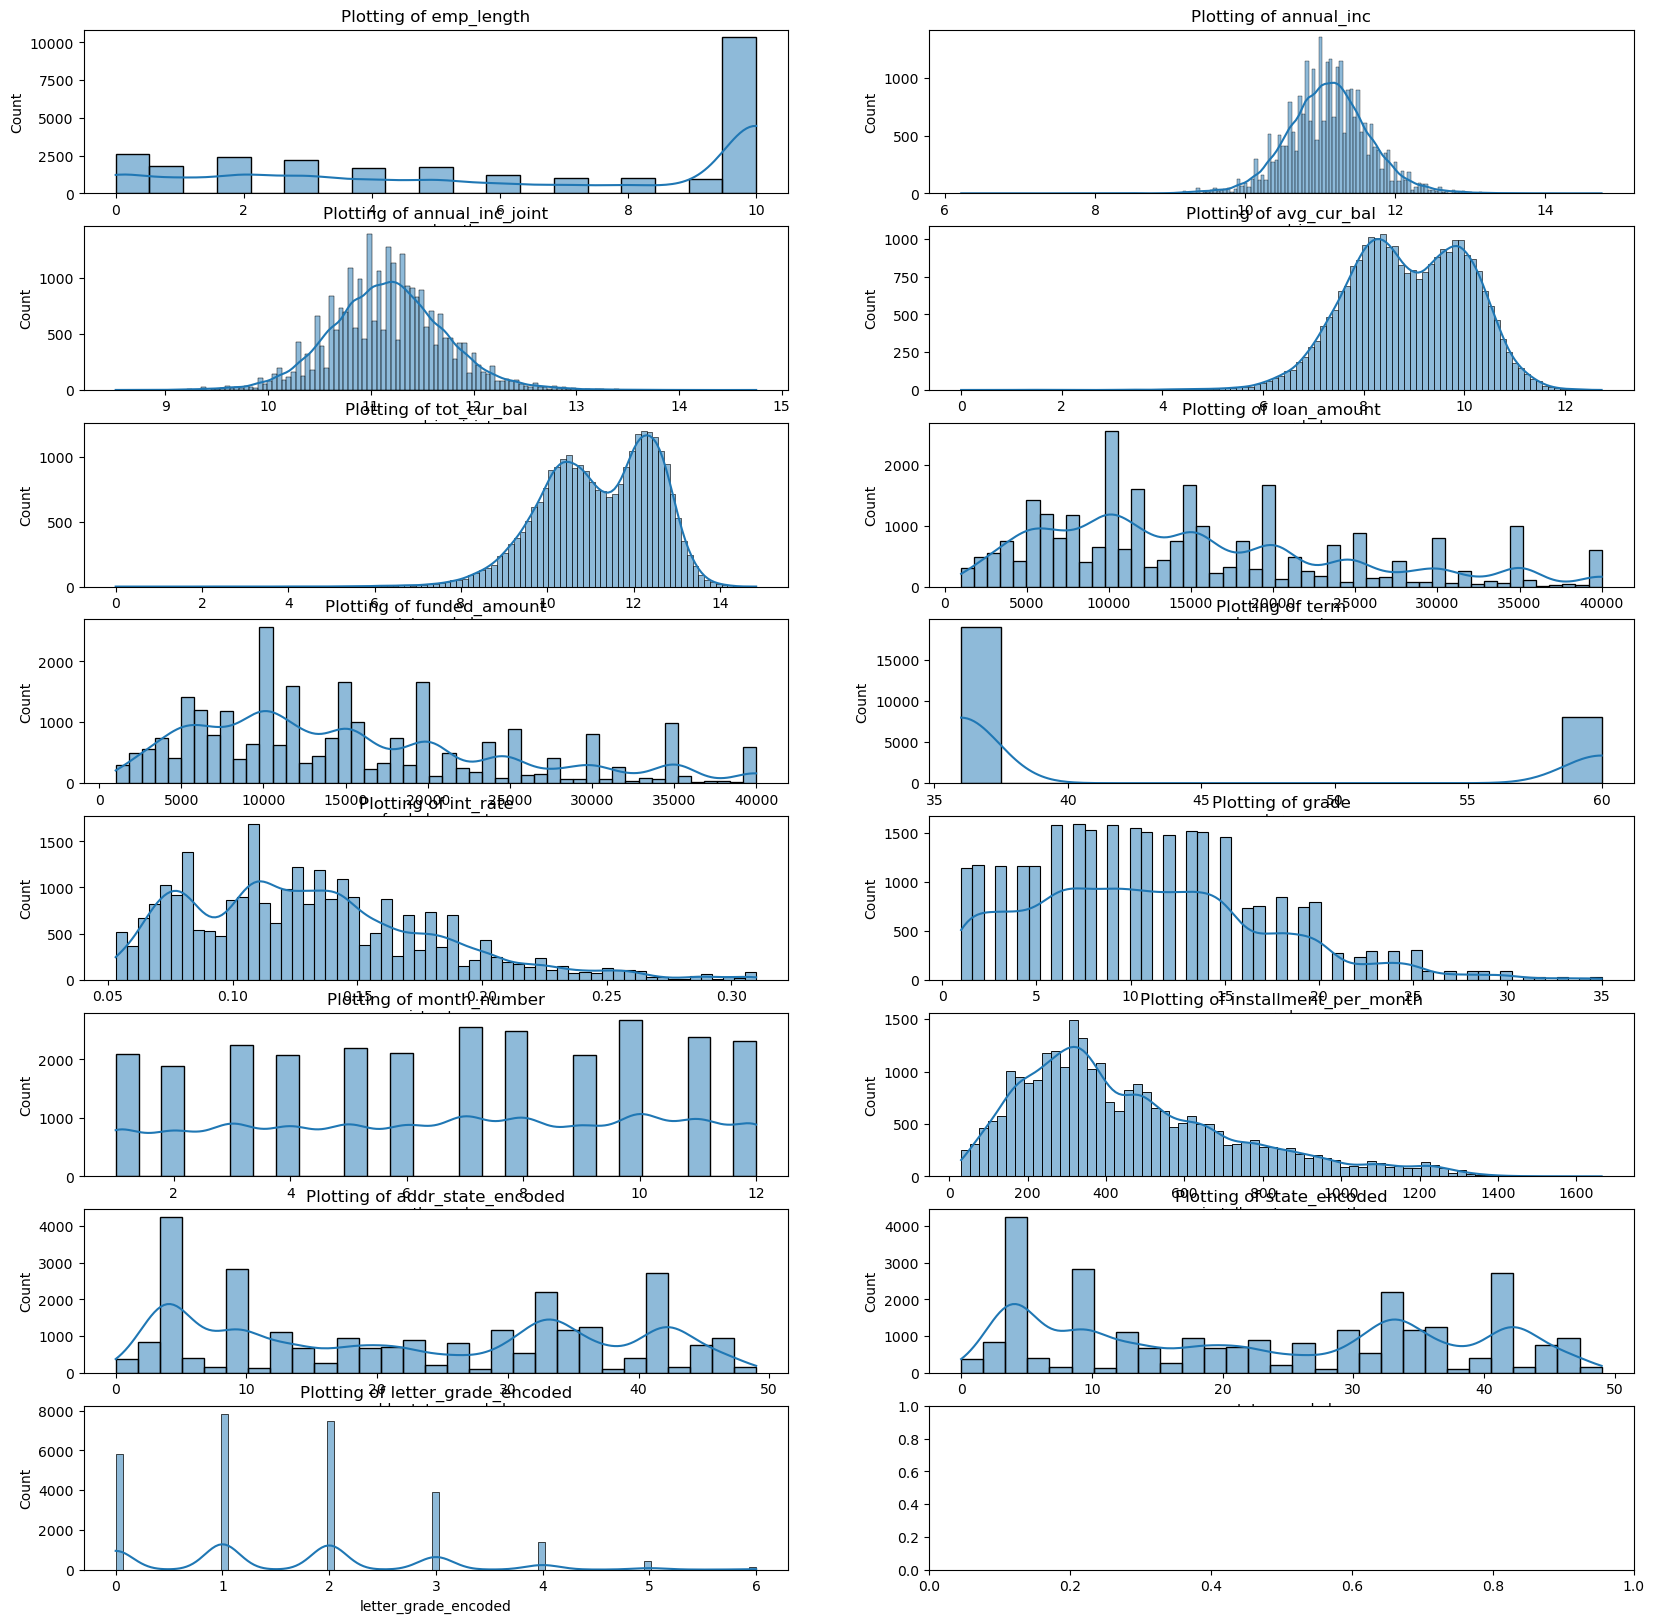

In [382]:
plot_columns(fintech_df, fintech_df.select_dtypes(include=np.number).columns, 0)

## 4.31 - Findings and conclusions

We can notice that most of the columns have small values near each other, except for the `funded_amount` and `loan_amount` columns. So we can choose to normalize the data. Also, `installment_per_month` values reaches 1500s, so we can normalize it as well.

We can use the Log Transformation to normalize the data. why? because it is suitable for data that is continuous. It also helps in the skewness of the data because most of the chosen columns are skewed to the right.

In [383]:
# use log transformation
def normalize_columns(df: pd.DataFrame, cols: list = None) -> pd.DataFrame:
    fintech_df_normalized = df.copy()
    cols = ['loan_amount', 'funded_amount', 'installment_per_month'] if cols is None else cols
    for col in cols:
        fintech_df_normalized[col] = np.log1p(fintech_df_normalized[col])
    return fintech_df_normalized

fintech_df_normalized = normalize_columns(fintech_df)
for col in fintech_df_normalized.select_dtypes(include=np.number).columns:
    print(col, ":   min=" , fintech_df_normalized[col].min(), " max=", fintech_df_normalized[col].max())

emp_length :   min= 0  max= 10
annual_inc :   min= 6.2166061010848646  max= 14.750819688138792
annual_inc_joint :   min= 8.517393171418904  max= 14.750819688138792
avg_cur_bal :   min= 0.0  max= 12.729421524961454
tot_cur_bal :   min= 0.0  max= 14.842412715307894
loan_amount :   min= 6.90875477931522  max= 10.596659732783579
funded_amount :   min= 6.90875477931522  max= 10.596659732783579
term :   min= 36  max= 60
int_rate :   min= 0.0531  max= 0.3099
grade :   min= 1  max= 35
month_number :   min= 1  max= 12
installment_per_month :   min= 3.4376829888316442  max= 7.417919780501229
addr_state_encoded :   min= 0  max= 49
state_encoded :   min= 0  max= 49
letter_grade_encoded :   min= 0  max= 6


In [384]:
# save normalized
fintech_df = fintech_df_normalized

# 5 - Lookup Table(s)

I generated a lookup table globally, then in each function, I updated it with the new values for each step, imputations, encodings, etc.

In [385]:
lookup_table.to_csv(data_dir + 'lookup_table.csv', index=False)
lookup_table.sample(10)

,column,original,imputed
112,state,MD,19
128,state,DC,7
101,state,OK,35
119,state,SC,39
20,grade,18,D
49,addr_state,MA,18
113,state,OR,36
97,state,CT,6
3,grade,1,A
21,grade,19,D


# 6 - Bonus ( Data Integration )

## Web Scraping using BeautifulSoup

In [386]:
from bs4 import BeautifulSoup
import requests
import lxml.html as lh

In [387]:
scrape_url = 'https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971'
response = requests.get(scrape_url)

soup = BeautifulSoup(response.text, 'lxml')

dom = lh.fromstring(str(soup))

We can get the XPath of the table and rows, then loop through the rows and get the data. 

As we can see, all rows have the same structure and nearly the same XPath.

The reason for this is that I am used to using the XPath to get the data, and it is more accurate than using the class name or the tag name.

In [388]:

# Alpha Code XPath
alpha_code_xpath =      '/html/body/main/div[3]/div/div/table/tbody/tr[*]/td[3]'
full_state_name_xpath = '/html/body/main/div[3]/div/div/table/tbody/tr[*]/td[1]'
alpha_codes = dom.xpath(alpha_code_xpath)
full_state_names = dom.xpath(full_state_name_xpath)

state_codes = [code.text for code in alpha_codes]
state_names = [name.text for name in full_state_names]

state_codes, state_names

(['AL',
  'AK',
  'AZ',
  'AR',
  'CA',
  'CO',
  'CT',
  'DE',
  'DC',
  'FL',
  'GA',
  'HI',
  'ID',
  'IL',
  'IN',
  'IA',
  'KS',
  'KY',
  'LA',
  'ME',
  'MD',
  'MA',
  'MI',
  'MN',
  'MS',
  'MO',
  'MT',
  'NE',
  'NV',
  'NH',
  'NJ',
  'NM',
  'NY',
  'NC',
  'ND',
  'OH',
  'OK',
  'OR',
  'PA',
  'RI',
  'SC',
  'SD',
  'TN',
  'TX',
  'UT',
  'VT',
  'VA',
  'WA',
  'WV',
  'WI',
  'WY'],
 ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'Sout

Now after getting the data, we can convert it to a Dictionary for example, and use it to update the dataset.

In [389]:
code_state_dict = dict(zip(state_codes, state_names))

print(code_state_dict)
    

{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}


**BINGO!** We have successfully imported the data from the website.

## Adding the new data to the dataset

In [390]:
fintech_df['state_name'] = fintech_df['state'].transform(lambda x: code_state_dict[x] if x in code_state_dict else 'Unknown')

fintech_df.sample(3)

,customer_id,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,description,month_number,salary_can_cover,letter_grade,installment_per_month,addr_state_encoded,state_encoded,letter_grade_encoded,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_source_verified,verification_status_verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,type_individual,type_joint,loan_status_current,loan_status_default,loan_status_fully_paid,loan_status_in_grace_period,loan_status_late_(16_30_days),loan_status_late_(31_120_days),state_name
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
264456,YidceGZiXHgwNVx4OTRceDg2XHhiZlx0bklceDlmXHgxYl...,electrical engineer,4,11.512935,11.512935,112xx,NY,8.677951,10.757179,10.596660,NY,10.596660,36,0.0846,1,2018-08-18,False,credit card refinancing,8,True,A,7.141214,33,33,0,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,New York
125900,YidceGI3XHhlMndceDkyXHhmMlx4ZTY6XHg5ZTFceGU3XX...,operations & financial analyst,0,10.950824,10.950824,327xx,FL,9.445966,12.010897,9.392745,FL,9.392745,60,0.1356,12,2018-07-18,False,debt consolidation,7,True,C,5.625782,9,9,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,Florida
170764,Yic3OXBceGU1aklTXHhiNVx4OGZceGE3XHhlZVx4ZjBceG...,shop foreman,10,11.002117,11.002117,024xx,MA,8.655563,10.958061,9.717218,MA,9.717218,36,0.0917,8,2015-09-15,False,credit card refinancing,9,True,B,6.273235,18,18,1,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,Massachusetts


## 5- Exporting the dataframe to a csv file or parquet

In [391]:
# save the cleaned dataset
pq.write_table(pa.Table.from_pandas(fintech_df), data_dir + 'fintech_data_MET_P2_52_20136_clean.parquet')

In [392]:

"".join(
        map(
            chr,
            [
                84, 104, 97, 110, 107, 32, 89, 111, 117,
                32, 102, 111, 114, 32, 121, 111, 117,
                114, 32, 116, 105, 109, 101, 44, 32, 77,
                  101, 100, 104, 97, 116, 32, 58, 41
            ]
        )
    )


'Thank You for your time, Medhat :)'